
### Continued data analysis


### Decision Tree

**Library Imports**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

**Importing the csv file with CAD=X data**

In [2]:
# Import the CAD=X currency pair data from the CSV file
df = pd.read_csv('cad_x_currency_data.csv', index_col=0)
df

,Ticker,Open,High,Low,Close,Adj Close,Time
Date,,,,,,,
2008-08-01,CAD=X,1.02340,1.02940,1.02290,1.02460,1.02460,2
2008-08-04,CAD=X,1.02800,1.03680,1.02620,1.03640,1.03640,8
2008-08-05,CAD=X,1.03630,1.04480,1.03630,1.04260,1.04260,14
2008-08-06,CAD=X,1.04260,1.04930,1.04000,1.04750,1.04750,20
2008-08-07,CAD=X,1.04760,1.05330,1.04490,1.05200,1.05200,26
...,...,...,...,...,...,...,...
2023-07-24,CAD=X,1.32240,1.32276,1.31542,1.32240,1.32240,38937
2023-07-25,CAD=X,1.31746,1.32095,1.31466,1.31746,1.31746,38947
2023-07-26,CAD=X,1.31871,1.32352,1.31720,1.31871,1.31871,38957


In [3]:
df.shape

(3905, 7)

In [4]:
df.head()

,Ticker,Open,High,Low,Close,Adj Close,Time
Date,,,,,,,
2008-08-01,CAD=X,1.0234,1.0294,1.0229,1.0246,1.0246,2
2008-08-04,CAD=X,1.0280,1.0368,1.0262,1.0364,1.0364,8
2008-08-05,CAD=X,1.0363,1.0448,1.0363,1.0426,1.0426,14
2008-08-06,CAD=X,1.0426,1.0493,1.0400,1.0475,1.0475,20
2008-08-07,CAD=X,1.0476,1.0533,1.0449,1.0520,1.0520,26


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3905 entries, 2008-08-01 to 2023-07-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     3905 non-null   object 
 1   Open       3905 non-null   float64
 2   High       3905 non-null   float64
 3   Low        3905 non-null   float64
 4   Close      3905 non-null   float64
 5   Adj Close  3905 non-null   float64
 6   Time       3905 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 244.1+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Time
count,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000
mean,1.198423,1.202731,1.194271,1.198412,1.198412,19457.018438
std,0.136652,0.136947,0.136378,0.136623,0.136623,11274.606568
min,0.943000,0.947200,0.940600,0.943200,0.943200,2.000000
25%,1.049800,1.054770,1.044800,1.049800,1.049800,9693.000000
50%,1.254420,1.259230,1.250170,1.254400,1.254400,19458.000000
75%,1.315860,1.319310,1.312870,1.315800,1.315800,29218.000000
max,1.458030,1.468730,1.449370,1.457800,1.457800,38977.000000


In [7]:
# Check for missing values in each column
missing_values = df.isna().sum()
print(missing_values)

Ticker       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Time         0
dtype: int64


**Interest in 1-year's data**

Filter the data for 2022

In [8]:
# Select the data for the year of interest
df_2022 = df.loc['2022-01-01':'2022-12-31']

**Pick the features and target variables**

In [9]:
X_2022 = df_2022[['Open', 'High', 'Low']]  # Features
y_2022 = df_2022['Close']  # Target


**Train test split**

Train test split ratio - 80-20

In [10]:
# Selecting a split of 80 -20
split_point = int(len(X_2022) * 0.8)

# selecting train data
X_train = X_2022.iloc[:split_point]
y_train = y_2022.iloc[:split_point]

# selecting test data
X_test = X_2022.iloc[split_point:]
y_test = y_2022.iloc[split_point:]


In [11]:
# Fit the DT model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)


predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error for 2022: {mse}")


Mean Squared Error for 2022: 1.3259128271359849e-05


The mean is low and shows that the model is performing well for the year 2022

**Model Evaluation**

**R-squared (Coefficient of Determination):**

In [12]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f"R-squared for 2022: {r2}")

R-squared for 2022: 0.9248586562527922


**Mean Absolute Error (MAE):**

In [13]:
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error for 2022: {mae}")

Mean Absolute Error for 2022: 0.0025894183378953072


**Mean Squared Error (MSE):**

In [14]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error for 2022: {mse}")


Mean Squared Error for 2022: 1.3259128271359849e-05


**Root Mean Squared Error (RMSE):**

In [15]:
from math import sqrt

rmse = sqrt(mse)
print(f"Root Mean Squared Error for 2022: {rmse}")


Root Mean Squared Error for 2022: 0.003641308593261473


R-squared value of approximately 0.91 suggests that the model is capturing a significant portion of the variance in the data. The low values for MAE, MSE, and RMSE indicate that the model's predictions are generally close to the actual values.

**Plot Actual versus Predicted**

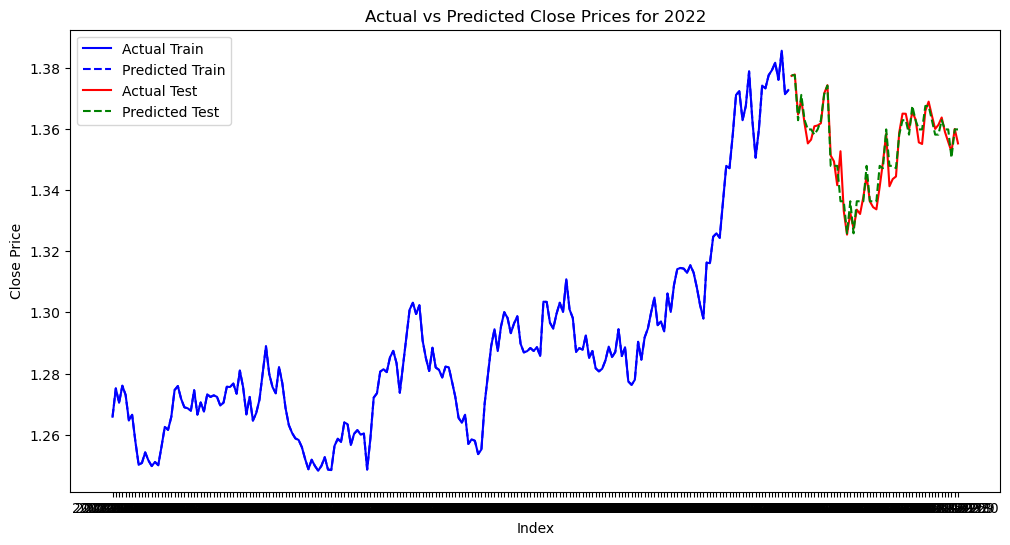

In [16]:
import matplotlib.pyplot as plt

# Make predictions for the training set
train_predictions = model.predict(X_train)

# Combine the actual and predicted values for the training and testing sets
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': train_predictions})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_results['Actual'], label='Actual Train', color='blue')
plt.plot(train_results['Predicted'], label='Predicted Train', color='blue', linestyle='--')
plt.plot(test_results['Actual'], label='Actual Test', color='red')
plt.plot(test_results['Predicted'], label='Predicted Test', color='green', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices for 2022')
plt.legend()
plt.show()


### Iteration 2

**Feature Engineering**

1. Percent change feature will capture change from previous day's close rates

In [17]:
# Calculate the percentage change in 'Close' rates from the previous day
df['Close_pct_change'] = df['Close'].pct_change()

# The first row will have NaN because there's no previous day to compare with
# fill it with 0
df['Close_pct_change'] = df['Close_pct_change'].fillna(0)

# Display the head to confirm the new feature
df.head()

,Ticker,Open,High,Low,Close,Adj Close,Time,Close_pct_change
Date,,,,,,,,
2008-08-01,CAD=X,1.0234,1.0294,1.0229,1.0246,1.0246,2,0.000000
2008-08-04,CAD=X,1.0280,1.0368,1.0262,1.0364,1.0364,8,0.011517
2008-08-05,CAD=X,1.0363,1.0448,1.0363,1.0426,1.0426,14,0.005982
2008-08-06,CAD=X,1.0426,1.0493,1.0400,1.0475,1.0475,20,0.004700
2008-08-07,CAD=X,1.0476,1.0533,1.0449,1.0520,1.0520,26,0.004296


2. Adding a second feature for moving averages

In [18]:
# Create a new feature (a 5-day moving average of the Close price)
df['Moving_Average'] = df['Close'].rolling(window=5).mean()

In [19]:
# Filter the data for the year 2022
df_2022 = df.loc['2022-01-01':'2022-12-31']

In [20]:
df_2022

,Ticker,Open,High,Low,Close,Adj Close,Time,Close_pct_change,Moving_Average
Date,,,,,,,,,
2022-01-03,CAD=X,1.26571,1.27781,1.26440,1.26588,1.26588,34887,-0.006717,1.275716
2022-01-04,CAD=X,1.27514,1.27656,1.26672,1.27513,1.27513,34897,0.007307,1.275002
2022-01-05,CAD=X,1.27035,1.27392,1.26911,1.27044,1.27044,34907,-0.003678,1.272830
2022-01-06,CAD=X,1.27576,1.28133,1.27226,1.27601,1.27601,34917,0.004384,1.272380
2022-01-07,CAD=X,1.27269,1.27296,1.26426,1.27302,1.27302,34927,-0.002343,1.272096
...,...,...,...,...,...,...,...,...,...
2022-12-26,CAD=X,1.35897,1.36330,1.35458,1.35897,1.35897,37437,-0.003454,1.361632
2022-12-27,CAD=X,1.35570,1.35680,1.34846,1.35570,1.35570,37447,-0.002406,1.359912
2022-12-28,CAD=X,1.35250,1.35983,1.34861,1.35250,1.35250,37457,-0.002360,1.358424


Choosing the variables/features of interest for X

In [24]:
# Split the data into features (including the new feature) and target
X_2022 = df_2022[['Open', 'High', 'Low', 'Moving_Average', 'Close_pct_change']]  # Include the new feature
y_2022 = df_2022['Close']

In [25]:
X_2022

,Open,High,Low,Moving_Average,Close_pct_change
Date,,,,,
2022-01-03,1.26571,1.27781,1.26440,1.275716,-0.006717
2022-01-04,1.27514,1.27656,1.26672,1.275002,0.007307
2022-01-05,1.27035,1.27392,1.26911,1.272830,-0.003678
2022-01-06,1.27576,1.28133,1.27226,1.272380,0.004384
2022-01-07,1.27269,1.27296,1.26426,1.272096,-0.002343
...,...,...,...,...,...
2022-12-26,1.35897,1.36330,1.35458,1.361632,-0.003454
2022-12-27,1.35570,1.35680,1.34846,1.359912,-0.002406
2022-12-28,1.35250,1.35983,1.34861,1.358424,-0.002360


**Train-Test split - 80-20**

In [26]:
# Split the data into training and testing sets (80-20 split)
# Define split point
split_point = int(len(X_2022) * 0.8)

# create X and y splits for training set
X_train = X_2022.iloc[:split_point]
y_train = y_2022.iloc[:split_point]

# create X and y splits for test set
X_test = X_2022.iloc[split_point:]
y_test = y_2022.iloc[split_point:]


Fitting a baseline model

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the decision tree model with default parameters
dtree = DecisionTreeRegressor()

# Fit the model to the training data
dtree.fit(X_train, y_train)

# Make predictions on the test set
predictions = dtree.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)
print(f"Baseline Mean Squared Error: {mse}")


Baseline Mean Squared Error: 3.11580756496927e-05


Performing grid search to find best parameters

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the decision tree model
dtree = DecisionTreeRegressor()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Use these best parameters to create a new decision tree model
best_dtree = DecisionTreeRegressor(**best_params)
best_dtree.fit(X_train, y_train)


Best parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=7)

In [29]:
# Create a new decision tree model using the best parameters
best_dtree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=1, min_samples_split=2)

# Fit the model to the training data
best_dtree.fit(X_train, y_train)

# Make predictions on the test set
best_predictions = best_dtree.predict(X_test)

# Calculate the mean squared error for the optimized model
best_mse = mean_squared_error(y_test, best_predictions)
print(f"Mean Squared Error with Best Parameters: {best_mse}")


Mean Squared Error with Best Parameters: 4.070273027641978e-05


**Plotting the actual versus predictions for visual inspection**

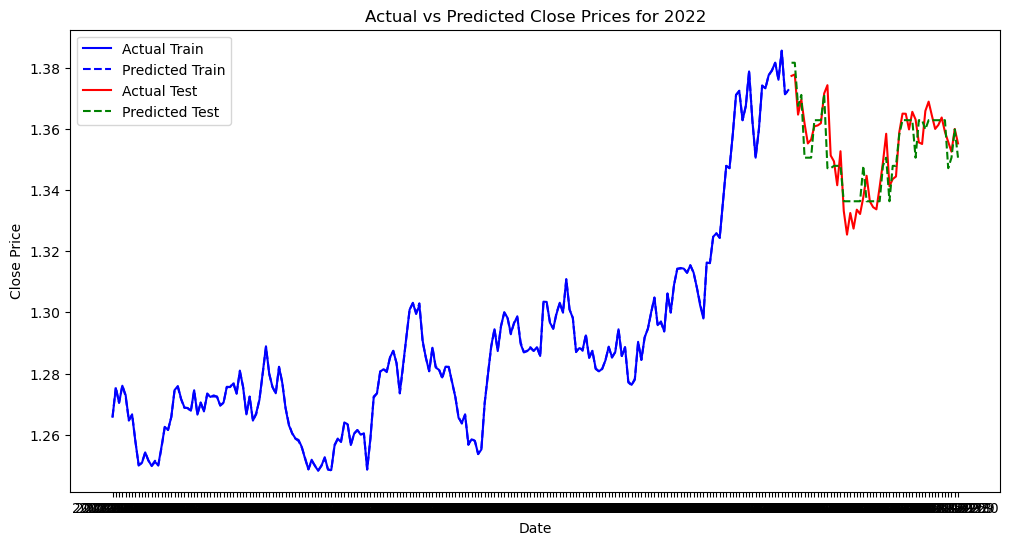

In [31]:
# Make predictions on the training set for plotting purposes
train_predictions = best_dtree.predict(X_train)

# Create a figure and axis
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Actual Train', color='blue')
plt.plot(y_train.index, train_predictions, label='Predicted Train', color='blue', linestyle='--')
plt.plot(y_test.index, y_test, label='Actual Test', color='red')
plt.plot(y_test.index, best_predictions, label='Predicted Test', color='green', linestyle='--')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices for 2022')
plt.legend()

# Show the plot
plt.show()


In [32]:
# Calculate MSE for the training set
train_mse = mean_squared_error(y_train, train_predictions)

# Calculate MSE for the testing set
test_mse = mean_squared_error(y_test, best_predictions)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")

# Compare the MSE values
if train_mse < test_mse:
    print("The model may be overfitting.")
else:
    print("The model is likely generalizing well.")


Training MSE: 4.538285062475157e-08
Testing MSE: 4.070273027641978e-05
The model may be overfitting.


**Conclusion**

With the above results, decision tree models are highly likely to overfit with a small dataset in this case. The maybe other complex reasons for this including feature selection. Also, MSE may not be capturing fully, the model's ability to generalize